In [26]:
# Dependencies needed to import SQL database into Pandas using SQLAlchemy.
%matplotlib notebook
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from config import db_location

In [27]:
# Create an engine to talk to the database.
engine = create_engine(db_location)
connection = engine.connect()

In [28]:
# Create a dataframe of salaries for employees.
sal_range_df = pd.read_sql('SELECT e.emp_no AS "employee number", s.salary FROM salaries AS s JOIN employees AS e ON e.emp_no=s.emp_no;', connection)
sal_range_df.head()

,employee number,salary
0,10001,60117
1,10005,78228
2,10010,72488
3,10011,42365
4,10013,40000


<IPython.core.display.Javascript object>


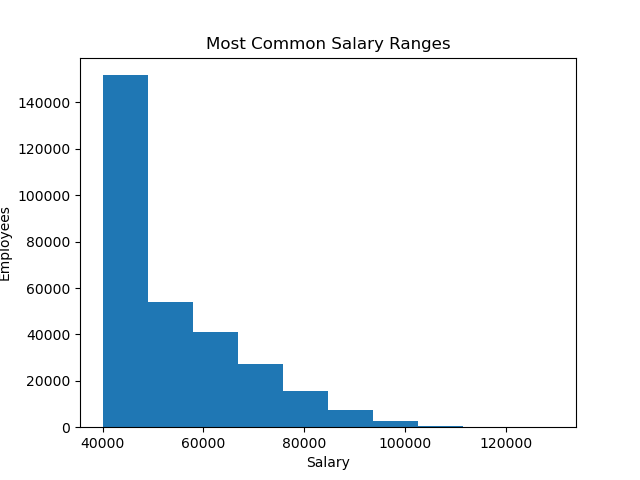

In [29]:
# Create a histogram to visualize the most common salary ranges for employees.
plt.figure()
plt.hist(sal_range_df["salary"])
plt.xlabel("Salary")
plt.ylabel("Employees")
plt.title("Most Common Salary Ranges")
plt.show()

In [30]:
# Create a dataFrame of average salary by title
avg_salary_df = pd.read_sql('SELECT t.title, ROUND(AVG(s.salary),2) AS "average salary" FROM salaries AS s JOIN employees AS e ON e.emp_no=s.emp_no JOIN titles AS t ON e.emp_title_id=t.title_id GROUP BY t.title;', connection)
avg_salary_df

,title,average salary
0,Assistant Engineer,48564.43
1,Engineer,48535.34
2,Manager,51531.04
3,Senior Engineer,48506.80
4,Senior Staff,58550.17
5,Staff,58465.38
6,Technique Leader,48582.90


<IPython.core.display.Javascript object>


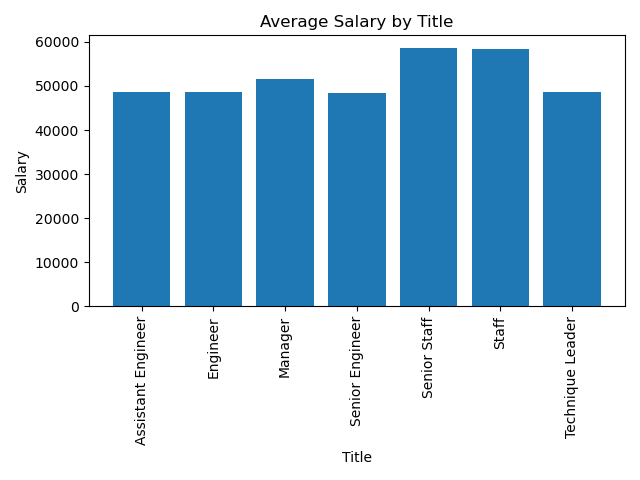

In [35]:
# Create a bar chart of average salary by title
plt.figure()
plt.bar(avg_salary_df["title"], avg_salary_df["average salary"])
plt.xticks(rotation='vertical')
plt.xlabel("Title")
plt.ylabel("Salary")
plt.title("Average Salary by Title")
plt.tight_layout()
plt.show()